<a href="https://colab.research.google.com/github/narhelmi/warmup-narhelmi/blob/main/warm_up_narges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91353    0 91353    0     0   200k      0 --:--:-- --:--:-- --:--:--  200k
Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       
sample_data  winequality.names	winequality-red.csv  winequality-white.csv  wine+quality.zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulf

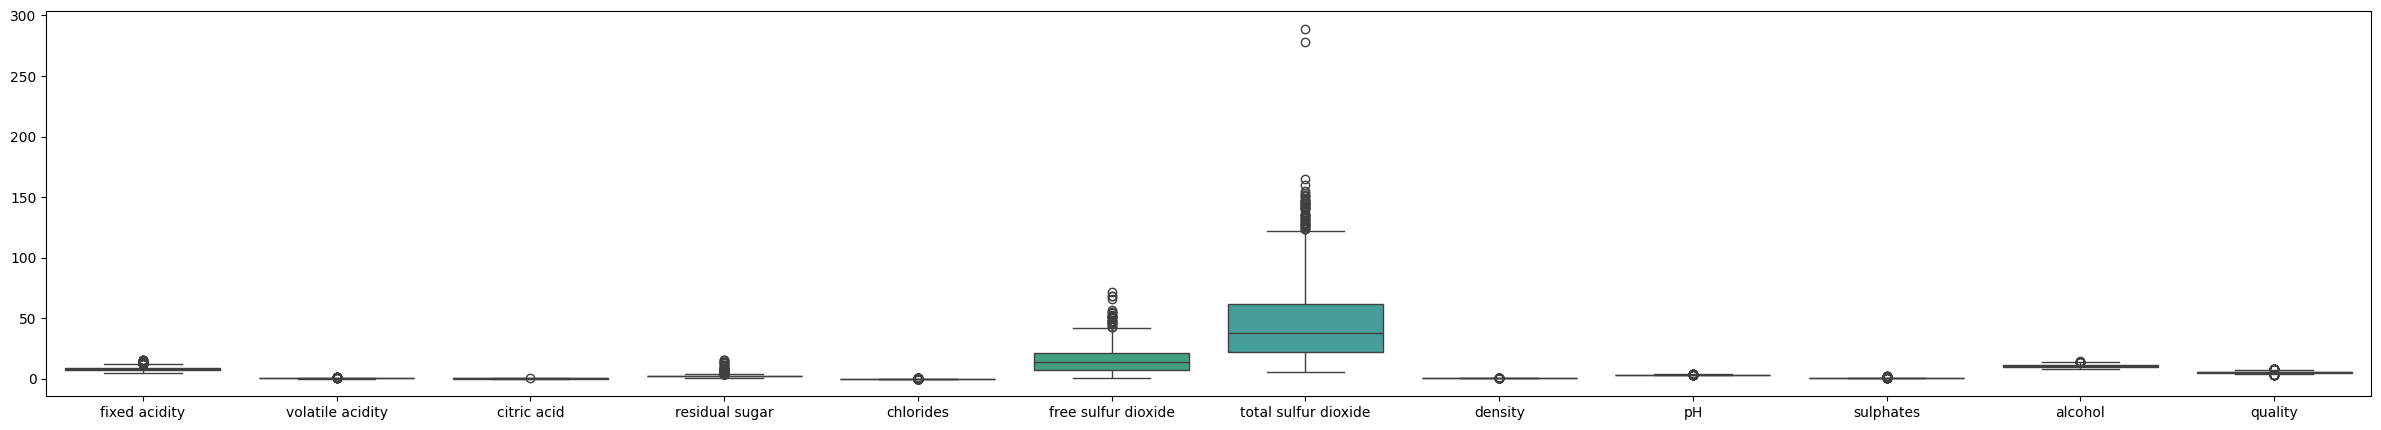

Linear Regression:
 Mean Squared Error: 0.409384015104224
Linear Regression RMSE : 0.6398312395501051
\Logistic Regression:
logistic Regression Accuracy: 0.6125


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Download dataset
!curl https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O -J -L && unzip -o wine+quality.zip
!ls

# Load the dataset
path = './winequality-red.csv'
df = pd.read_csv(path, delimiter=';')

# Display dataset information and a sample
print(df.info())
print(df.sample())

# Visualize the dataset
plt.figure(figsize=(30, 5))
sns.boxplot(data=df)
plt.show()

# Data preprocessing
feature = df.drop('quality', axis=1)
target= df['quality']

# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=40)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression Model: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions with Linear Regression

y_test_pred_reg = lin_reg.predict(X_test)

# Evaluate Linear Regression
mse_test = mean_squared_error(y_test, y_test_pred_reg)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_reg))

print("Linear Regression:")
print(f" Mean Squared Error: {mse_test}")
print(f"Linear Regression RMSE : {linear_reg_rmse}")


# Classification Model: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions with Logistic Regression

y_logistic_reg_pred= log_reg.predict(X_test)

# Evaluate Logistic Regression
logistic_reg_accuracy = accuracy_score(y_test, y_logistic_reg_pred)



print(f"Logistic Regression:")
print(f"logistic Regression Accuracy: {logistic_reg_accuracy}")





linear regression model has RMSE = 0.63 which is almost more likely not good in predicting red wine quality, although it needs to compare with other models. The logistic regression model has accuracy = 0.61 which again needs to be compared with other at least two models to compare.